#Business Problem
###IBM'S biggest challenge among the telecom companies is customer churn, where customers leave due to price, quality of service or competetive offers. High churn leads to loss of revenue, increased customer acquisition cost, and decreased profitability.



###This problem is important
- Reducing churn increases the longterm value of each customer.
- Retaining existing customers is significantly cheaper that acquiring new ones.
- IBM should improve service personalization.


###Solving this problem benefits IBM
- Stronger AI driven offerings come if we improves churn prediction models for IBM's enterprise clients.
-Enhancing customer loyalty for telecom companies strengthens IBM'S business relationships.
-IBM can leverage its AI solutions to generate insights that telecom providers can use to create new revenue streams.




###Data collection strategy
To build an effective churn prediction model the data sources are necessary like Historical customer data, Usage patterns, Customer support interactions and Churn labels
- For this project, the Telco customer churn dataset serves as a foundation for training and validating machine learning models.

https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data



###Formulating the problem as a Machine Learning Task
This is a Supervised classification problem where the goal is to predict whether a customer will churn based on historical data. The machine learning pipeline includes:
- Data preprocessing
- Exploratory Data Analysis
- Feature Engineering
- Model selection & Training
- Model Evaluation
- Interpretability & Business Recommendations

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/data sets/Telco-Customer-Churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.shape

(7043, 21)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Exploratory Data Analysis
- Exploring each column to find the features that churn is dependent on.

<ipython-input-11-5ce7db446fa6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='tenure', data=df, palette='rocket')


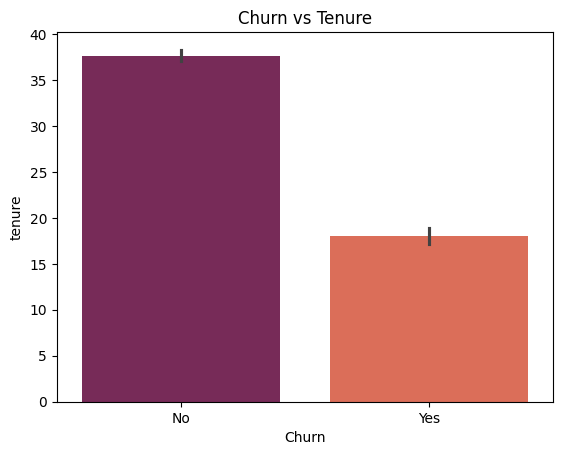

In [ ]:
sns.barplot(x='Churn', y='tenure', data=df, palette='rocket')
plt.title('Churn vs Tenure')
plt.show()

From above Bar-plot, the persons with less tenure period are the ones who left the telecom service.

In [ ]:
pd.crosstab(df['gender'],df['Churn'],normalize=True,margins=True)

Churn,No,Yes,All
gender,,,
Female,0.361775,0.133532,0.495307
Male,0.372440,0.132253,0.504693
All,0.734215,0.265785,1.000000


The crosstab shows the churn probabilities with respect to gender[male,female].
- There are equal number of Male and female customers in the data.
- And the churn probability is almost same for both.

In [ ]:
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize=True,margins=True)

Churn,No,Yes,All
SeniorCitizen,,,
0,0.639505,0.198094,0.8376
1,0.094710,0.067691,0.1624
All,0.734215,0.265785,1.0000


The above crosstab shows the Churn probability with respect to Senior citizen
- The dataset contains less number of senior citizens.
- The probability of senior citizen leaving the services is very less.

In [ ]:
pd.crosstab(df['Contract'],df['Churn'],normalize=True,margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,0.315700,0.235353,0.551052
One year,0.185722,0.023606,0.209329
Two year,0.232793,0.006826,0.239619
All,0.734215,0.265785,1.000000


The crosstab shows the churn probabilities with respect to customers with different contracts.
- Most of the customers who leave the service are with month-to-month contract.

In [ ]:
pd.crosstab(df['Dependents'],df['Churn'],normalize='index',margins=True)

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.844688,0.155312
All,0.734215,0.265785


If the customer is dependent, the probability of that customer leaving the service is very less.

In [ ]:
pd.crosstab(df['InternetService'],df['Churn'],normalize=True,margins=True)

Churn,No,Yes,All
InternetService,,,
DSL,0.278299,0.065273,0.343572
Fiber optic,0.255830,0.184443,0.440273
No,0.200085,0.016069,0.216155
All,0.734215,0.265785,1.000000


Customer with Fiber optic as the InternetService are high chances of leaving the services.

In [ ]:
pd.crosstab(df['PaymentMethod'],df['Churn'],normalize=True,margins=True)

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),0.182594,0.036689,0.219283
Credit card (automatic),0.183305,0.032992,0.216297
Electronic check,0.184016,0.152304,0.336320
Mailed check,0.184300,0.043800,0.228100
All,0.734215,0.265785,1.000000


If the customer uses Electronic check as the PaymentMethod, the probability of that customer leaving the services is more.

**Distribution of MonthlyCharges**

<ipython-input-18-80786bca3e82>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['MonthlyCharges'],palette='magma')


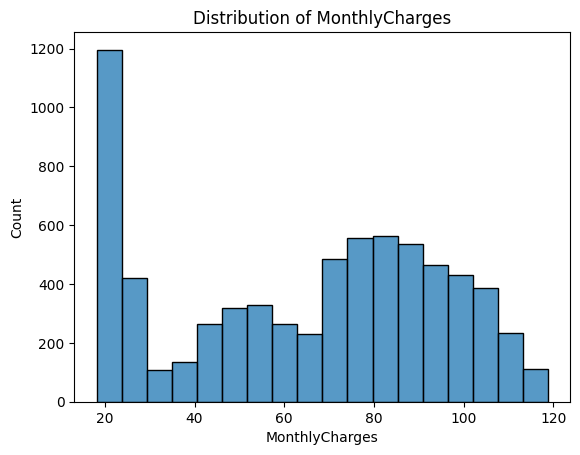

In [ ]:
sns.histplot(df['MonthlyCharges'],palette='magma')
plt.title('Distribution of MonthlyCharges')
plt.show()

**Distribution of TotalCharges**

<Axes: xlabel='TotalCharges', ylabel='Count'>

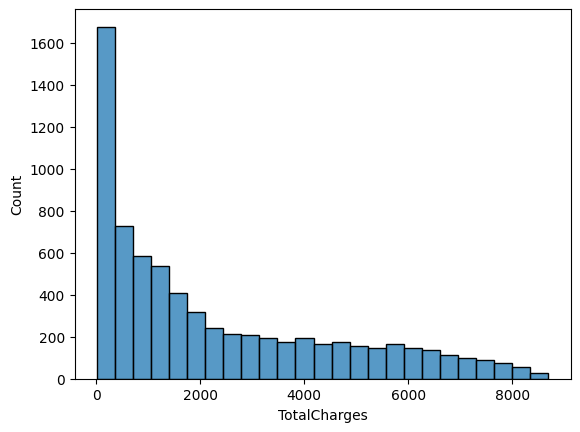

In [ ]:
sns.histplot(df['TotalCharges'])

## Data Preprocessing

**Converting Categorical columns to Numericals**

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df['gender'].replace({'Female':0,'Male':1},inplace=True)

<ipython-input-21-2ec0259a6176>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':0,'Male':1},inplace=True)
<ipython-input-21-2ec0259a6176>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':0,'Male':1},inplace=True)


In [ ]:
df['Partner'].replace({'No':0,'Yes':1},inplace=True)

<ipython-input-22-a9454a0d19e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Partner'].replace({'No':0,'Yes':1},inplace=True)
<ipython-input-22-a9454a0d19e3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'].replace({'No':0,'Yes':1},inplace=True)


In [ ]:
for i in ['Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
  df[i].replace({'No':0,'Yes':1},inplace=True)

<ipython-input-23-8d7280bada37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'No':0,'Yes':1},inplace=True)
<ipython-input-23-8d7280bada37>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace({'No':0,'Yes':1},inplace=True)


Using the **TargetEncoding technique** to convert categorical columns with 3 or
more categories.

In [ ]:
!pip install category_encoders

from category_encoders import TargetEncoder

In [ ]:
from sklearn.preprocessing import TargetEncoder
te = TargetEncoder()
df['StreamingTV'] = te.fit_transform(df['StreamingTV'].values.reshape(-1,1), df['Churn'])

In [ ]:
for i in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies',
       'Contract']:
       df[i] = te.fit_transform(df[i].values.reshape(-1, 1), df['Churn'])

In [ ]:
df['PaymentMethod'] = te.fit_transform(df['PaymentMethod'].values.reshape(-1, 1), df['Churn'])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.255102,0.190704,0.417699,0.215447,0.390350,0.418107,0.337620,0.339490,0.426756,1,0.453033,29.85,29.85,0
1,1,0,0,0,34,1,0.254503,0.190704,0.145268,0.404152,0.226414,0.418107,0.335506,0.338263,0.108800,0,0.192779,56.95,1889.50,0
2,1,0,0,0,2,1,0.255457,0.192035,0.147568,0.217391,0.398962,0.416359,0.335506,0.336753,0.425168,1,0.192779,53.85,108.15,1
3,1,0,0,0,45,0,0.248669,0.190704,0.148721,0.399525,0.222982,0.154698,0.334488,0.336642,0.108800,0,0.176524,42.30,1840.75,0
4,0,0,0,0,2,1,0.246693,0.417599,0.417170,0.402287,0.389544,0.416359,0.334488,0.336642,0.431381,1,0.450825,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0.281400,0.186560,0.147711,0.402287,0.226414,0.153610,0.302956,0.300209,0.107925,1,0.194205,84.80,1990.50,0
7039,0,0,1,1,72,1,0.292651,0.415028,0.419068,0.217391,0.217884,0.421651,0.302534,0.300622,0.112129,1,0.148545,103.20,7362.90,0
7040,0,0,1,1,11,0,0.260723,0.192035,0.145268,0.396612,0.398962,0.416359,0.337620,0.335095,0.425168,1,0.453988,29.60,346.45,0
7041,1,1,1,0,4,1,0.290107,0.420634,0.415532,0.404152,0.390350,0.421651,0.335085,0.335095,0.425168,1,0.192779,74.40,306.60,1


**Checking the Dtypes of dataset**

In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,float64
InternetService,float64
OnlineSecurity,float64
OnlineBackup,float64


**Splitting the dependent and independent features**

In [ ]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
y_test.value_counts()

,count
Churn,
0,1549
1,561


Since the Data is imbalanced, we need to oversample the minor category data.

### Balancing the data using SOMTE



In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
x_test,y_test = smote.fit_resample(x_test,y_test)

In [ ]:
y_train.value_counts()

,count
Churn,
1,3614
0,3614


In [ ]:
y_test.value_counts()

,count
Churn,
0,1549
1,1549


**Data is balanced**

#### Scaling the data

**Scaling the data using the MinMaxScaler** (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train_scaled = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(sc.transform(x_test), columns = x_test.columns)

### Evaluation Metrics
- Classification task has the metrics like F1 score, accuracy, recall, precision.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## **Building the Models**

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',min_impurity_decrease=0.001)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)
print("Test Scores ---")
print(classification_report(y_test,y_pred))
print("-"*20)
print("Train Scores ---")
print(classification_report(y_train,y_pred_train))

Test Scores ---
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1549
           1       0.83      0.77      0.80      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098

--------------------
Train Scores ---
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3614
           1       0.88      0.85      0.86      3614

    accuracy                           0.87      7228
   macro avg       0.87      0.87      0.87      7228
weighted avg       0.87      0.87      0.87      7228



Decision Tree classifier with minimum impurity decrease of 0.001 with entropy as criterion is applied.

The depth of the decision tree (No. of levels nodes formed)

In [ ]:
dt.get_depth()

14

Plotting the decision tree

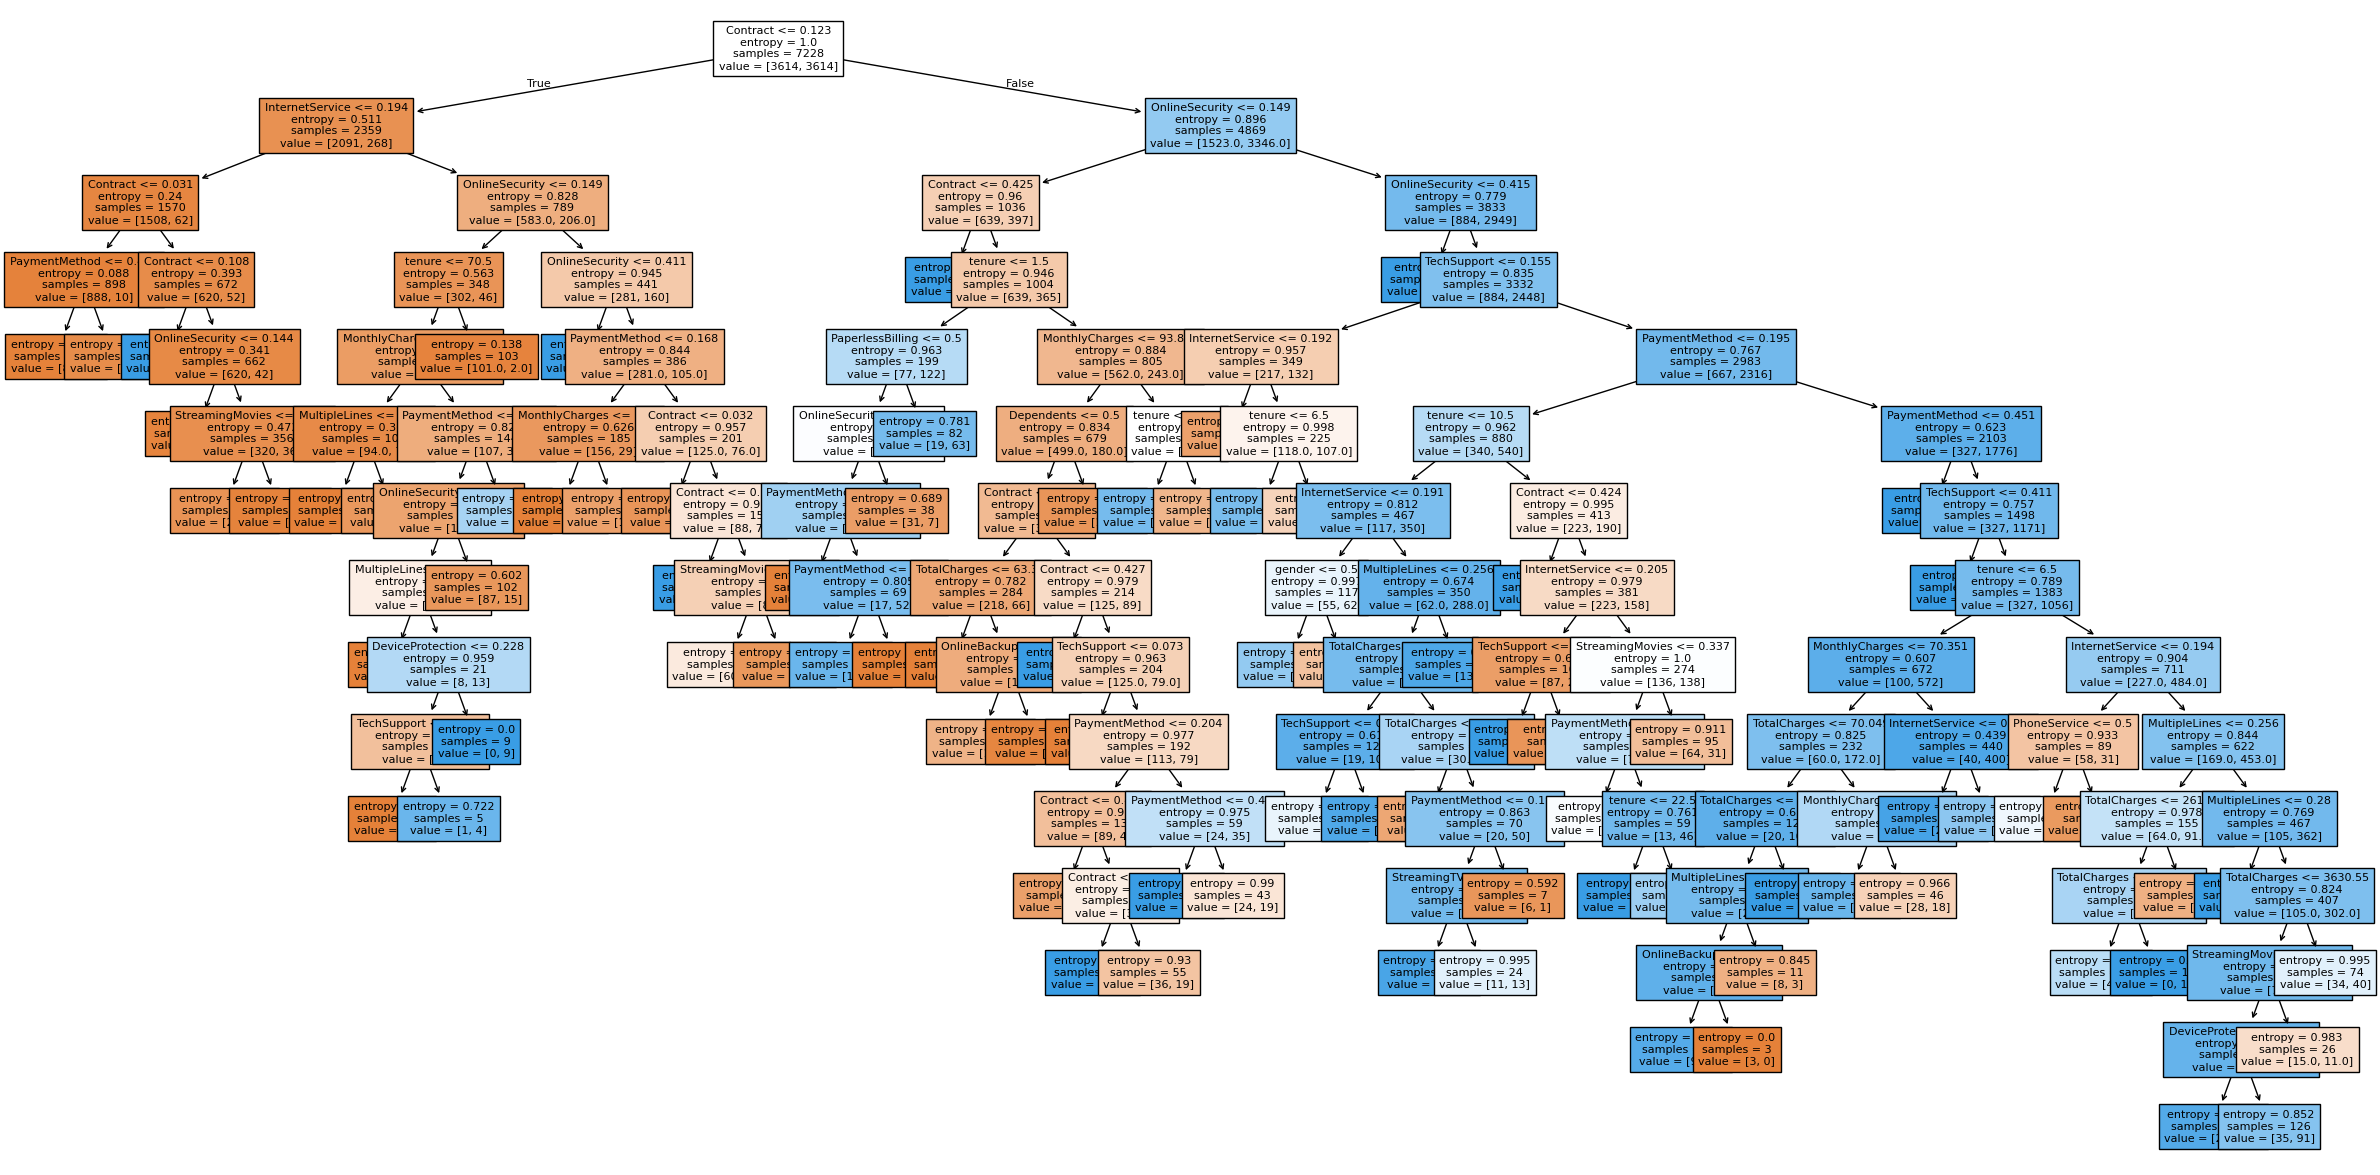

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30,15))
plot_tree(dt, fontsize = 8, feature_names = x_train.columns, filled = True)
plt.show()

Plotting **Confusion matrix** to check the No. of correct and wrong predictions

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[1304,  245],
       [ 360, 1189]])

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[3192,  422],
       [ 543, 3071]])

In [ ]:
!pip install mlxtend

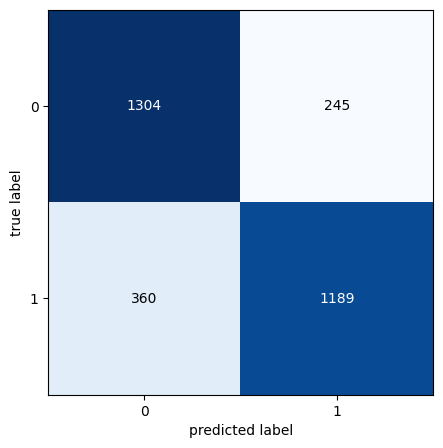

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm_test, figsize=(5, 5))
plt.show()

**In this Telecom Churn prediction, we should consider False Negative, since predicting the churn customer as not churn is the huge error. So, to reduce the False negative, we should increase the RECALL score. **

#### **Hyperparameter tuning**
Decision tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
dt_model = DecisionTreeClassifier()
param_grid = {"max_depth":np.linspace(3, 13, 6,dtype="int"),
            "min_samples_split" : [2, 5, 10, 15,20,25],
            "criterion": ["gini", "entropy"],
            "min_impurity_decrease" : [0.001,0.003,0.005,0.01, 0.03,0.05]
             }

Param grid for the hyper-parameter tuning. considering only max_depth, min_sample_split, criterion, min_impurity_decrease

In [ ]:
param_grid

{'max_depth': array([ 3,  5,  7,  9, 11, 13]),
 'min_samples_split': [2, 5, 10, 15, 20, 25],
 'criterion': ['gini', 'entropy'],
 'min_impurity_decrease': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05]}

Using the RandomizedSearchCV for the hyperparameter tuning, which take less time time to compute.

In [ ]:
rsv_model = RandomizedSearchCV(dt_model, param_grid, scoring = "recall", n_jobs = -1, cv = 3, verbose = 10)

In [ ]:
rsv_model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                                        'min_impurity_decrease': [0.001, 0.003,
                                                                  0.005, 0.01,
                                                                  0.03, 0.05],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25]},
                   scoring='recall', verbose=10)

Checking the best parameters that produce the best recall score

In [ ]:
rsv_model.best_params_

{'min_samples_split': 20,
 'min_impurity_decrease': 0.05,
 'max_depth': np.int64(9),
 'criterion': 'entropy'}

In [ ]:
rsv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(9),
                       min_impurity_decrease=0.05, min_samples_split=20)

In [ ]:
rsv_model.best_score_

np.float64(0.8395201793928031)

Building the model again using the best parameters

In [ ]:
dt_c = DecisionTreeClassifier(criterion='gini', max_depth=11,min_impurity_decrease=0.05, min_samples_split=25)
dt_c.fit(x_train,y_train)
y_pred = dt_c.predict(x_test)
y_pred_train = dt_c.predict(x_train)
print("Test Scores ---")
print(classification_report(y_test,y_pred))
print("-"*20)
print("Train Scores ---")
print(classification_report(y_train,y_pred_train))


Test Scores ---
              precision    recall  f1-score   support

           0       0.87      0.55      0.67      1549
           1       0.67      0.92      0.77      1549

    accuracy                           0.73      3098
   macro avg       0.77      0.73      0.72      3098
weighted avg       0.77      0.73      0.72      3098

--------------------
Train Scores ---
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      3614
           1       0.69      0.93      0.79      3614

    accuracy                           0.75      7228
   macro avg       0.79      0.75      0.74      7228
weighted avg       0.79      0.75      0.74      7228



**From the above scores the Decision Tree Classifier might be the good model.**
But need to check other models too.

### **Building Model 2**

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC(C = 1.0, kernel = "linear")
svc.fit(x_train_scaled,y_train)
y_pred = svc.predict(x_test_scaled)
y_pred_train = svc.predict(x_train_scaled)
print("Test Scores ---")
print(classification_report(y_test,y_pred))
print("-"*20)
print("Train Scores ---")
print(classification_report(y_train,y_pred_train))

Test Scores ---
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1549
           1       0.76      0.83      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

--------------------
Train Scores ---
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3614
           1       0.77      0.83      0.80      3614

    accuracy                           0.79      7228
   macro avg       0.79      0.79      0.79      7228
weighted avg       0.79      0.79      0.79      7228



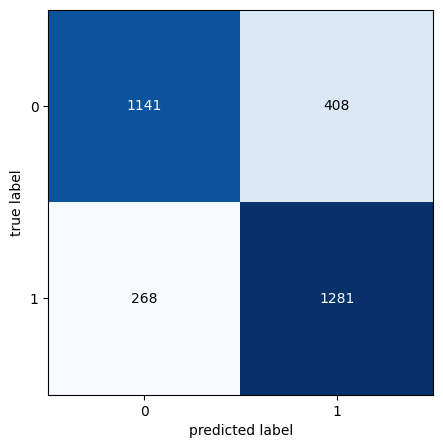

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(conf_mat=cm_test, figsize=(5, 5))
plt.show()

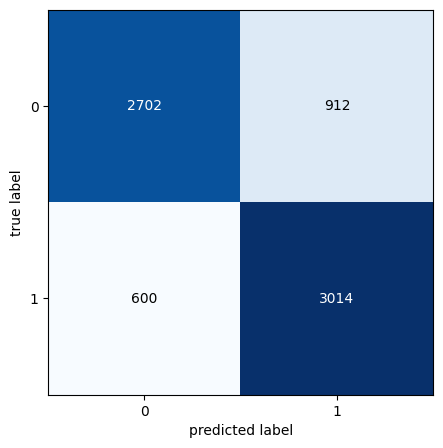

In [ ]:
plot_confusion_matrix(conf_mat=cm_train, figsize=(5, 5))
plt.show()

The SVM model is not overfitted but, gives the good results. Which has good scores when we compare the results with confusion matrices

### **Building Model 3**

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

c = confusion_matrix(y_test, y_pred)
print("Test Scores ---")
print(classification_report(y_test,y_pred))
print("-"*20)
print("Train Scores ---")
print(classification_report(y_train,y_pred_train))

Test Scores ---
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1549
           1       0.86      0.81      0.83      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

--------------------
Train Scores ---
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3614
           1       0.77      0.83      0.80      3614

    accuracy                           0.79      7228
   macro avg       0.79      0.79      0.79      7228
weighted avg       0.79      0.79      0.79      7228



RandomForestClassifier model is producing good results.

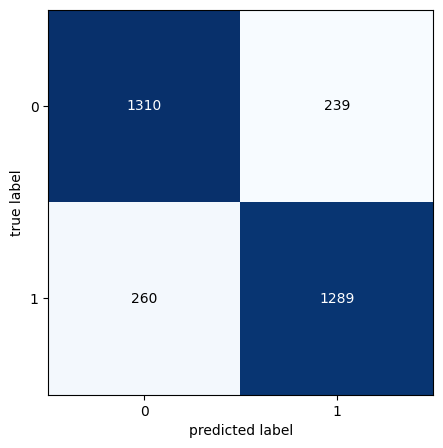

In [ ]:
plot_confusion_matrix(conf_mat=c_test, figsize=(5, 5))
plt.show()

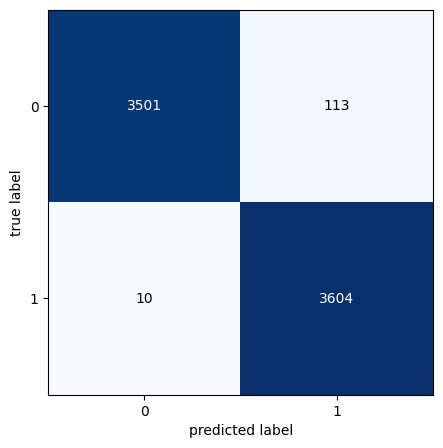

In [ ]:
plot_confusion_matrix(conf_mat=c_train, figsize=(5, 5))
plt.show()

By comparing the classification reports of all models, we can say that RandomForestClassifier is producing the better results.

### Saving the final model

In [ ]:
import joblib
joblib.dump(rf_clf, 'Telecom_classifier.pkl')
print("Model saved successfully!")

Model saved successfully!


#Conclusion

- By training and testing the DecisionTreeClassifier, SVM, RandomForestClassifier, Found that the RandomForestClassifier model is performing better.

- Using the RandomForestClassifier, that has built, the telecom churn predictions can be done with accuracy of 80 percent. Based on the predictions, telecom service can reach the customers who are about to churn and provide the good services and solutions for the customer problems.

###Stengths
- The machine learning model provides actionable insights by identifying key drivers of customer churn.
- Advanced algorithms such as Random Forest can detect complex patterns in customer behavior
- The solution can be expanded to handle larger datasets and deployed in real time customer retention systems.


###Limitations
- If historical data contains biases the model may make unfair predictions.
- The model does not account for external factors like competitors promotions or macroeconomics changes.
- The model may struggle with the new customers who lack historical data.
- Deploying a real time churn prediction system may require additional infrastructure and integration efforts.

###Implications of the Results for the Business Problem
- Telecom providers can target at risk customers with personalised offers before they leave.
- Predicting churn allows for efficient allocation of retention budgets.
- Insights from the model help identify common pain points leading to churn.

###Data-Driven Recommendations for Solving the Business problem
- Provide discounts, loyalty rewards or personalized plans to customers predicted to churn.
- Identify customers with frequent complaints and proactively address their issues.
- Detect patterns in churn related to billing and adjust pricing models accordingly.
- Use targeted communication such as emails, calls to engage customers showing signs of potential churn.
- Regularly retrain the model to adapt to evolving customer behavior and market trends.

###Most informative Features of the model
- Month-to-month customers are more likely to churn than those with longer-term contracts.
- Customers with shorter tenures have a higher churn probability.
- Higher monthly bills may contribute to churn, especially for price-sensitive customers.
- Electronic check payments might be linked to higher churn compared to credit card or bank transfer.
- Frequent interactions with support may indicate dissatisfaction and predict churn.